In [1]:
import pandas as pd
import openpyxl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 패치
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
df_20 = pd.read_excel('20_공실률.xls')

In [3]:
df_21 = pd.read_excel('21_공실률.xls')

In [4]:
df_20 = df_20[['하위상권', '공실률']]

In [5]:
df_21 = df_21[['하위상권', '공실률']]

In [6]:
coA = pd.merge(df_20, df_21, on='하위상권')

In [7]:
# 소계 다 짤라 버리기
coA = coA.drop(coA.index[:18])

In [8]:
coA = coA.reset_index()

In [9]:
coA = coA.drop('index',1)

C:\Users\82103\AppData\Local\Temp/ipykernel_2964/1625753909.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coA = coA.drop('index',1)


In [10]:
coA['평균'] = coA.iloc[:, 1:].mean(axis=1)

In [11]:
# ...없애기
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [12]:
coA.columns = ['지역', '2020공실률', '2021공실률', '평균']

<Figure size 1080x720 with 0 Axes>

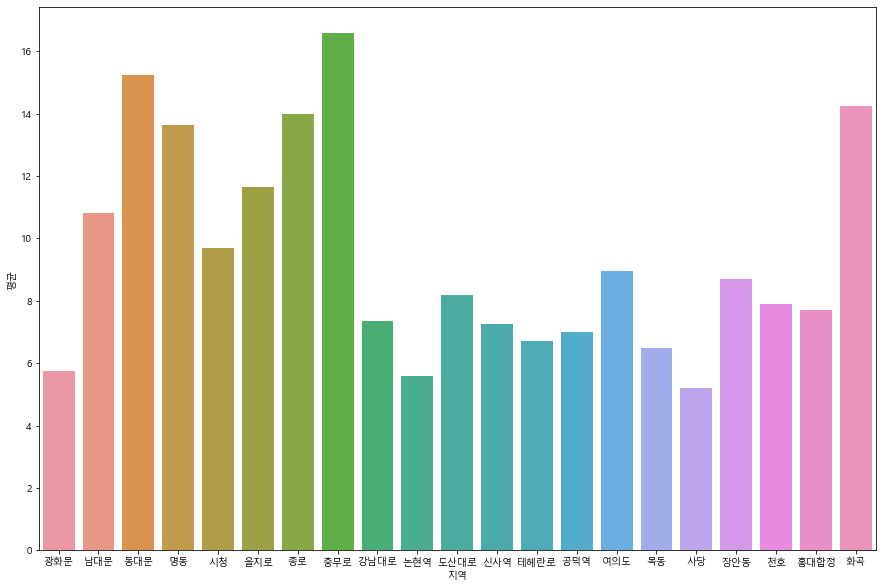

In [13]:
plt.figure(figsize=(15,10))
splot = sns.barplot(data=coA, x='지역', y='평균')
plt.show()
sfig = splot.get_figure()
sfig.savefig('2020-21_empty.png')

In [14]:
coA.to_csv('2020-21 공실률.csv')